# Nuages de mots

## Imports et stopwords

In [31]:
from collections import Counter
from wordcloud import WordCloud
import os
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from IPython.display import Image

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [72]:
# Stopwords (Idem que dans s1)
sw = stopwords.words("french")
sw += ["les", "plus", "cette", "fait", "faire", "être", "deux", "comme", "dont", "tout",
       "ils", "bien", "sans", "peut", "tous", "après", "ainsi", "donc", "cet", "sous",
       "celle", "entre", "encore", "toutes", "pendant", "moins", "dire", "cela", "non",
       "faut", "trois", "aussi", "dit", "avoir", "doit", "contre", "depuis", "autres",
       "van", "het", "autre", "jusqu", "ville", "van het", "texte texte", "membres prennent"
       , "collège van", "octobre TEXTE", "het collège", "prennent part", "van hun", "frs", 
       "membres", "décembre", "monsieur", "madame", "personnes", "nouveau", "approbation", 
       "fonctions", "mesdames", "charges", "elles", "demande", "mars", "moyen", "messieurs", "très", "concerne", "voir",
        "mai", "juin", "juillet", "août", "septembre", "octobre", "novembre", "janvier", "février",
        "avril", "jour", "conditions", "extraordinaires", "charge", "raison", "pouvoir", "fourniture",
        "suite", "ans", "intervention", "proposition", "déjà", "vue", "sujet", "divers", "application",
        "relative", "leurs", "idem", "proposer", "partie", "diverses", "heures", "populations", "adoptées",
        "pris", "accord", "principe", "prix", "état", "crédit", "question", "certaines", "aide",
        "part", "taux", "services", "ordre", "aucune", "articles", "publics", "suit", "mise", "avant",
        "etat", "agit", "celui", "compte", "administration", "assistance", "société", 
       "entretien", "cours", "communale", "total", "premier", "autorité", "territoire", "donner", "caisse", "communes", 
       "echevin", "nominal", "arrêté", "cas", "toujours", "een", "voix", "actes", "lors", "adoption", "pays", "discussions",
       "monnaie", "effet", "émettre", "montant", "travail", "chaque", "augmentation", "délibération", "temps", "etc", 
       "salaires", "droit", "fonds", "voté", "commission", "favorable", "recettes", "rien", "sollicite", "renouvellement",
       "public", "faite", "groupe", "alors", "terrain", "mois", "subsides", "population", "fin", "grand", "mandat", 
       "taxes", "voie", "situation", "nouvelle", "règlement", "traitements", "avis", "devant", "lieu", "nom", "également",
       "fois", "toute", "texte", "personnel", "exercice", "rapport", "paiement", "chapitre", "normale", "nombre",
       "date", "suivant", "amendement", "décision", "qualité", "primaires", "année", "rapports", "ceux", "projet", "parce", "que",
       "point", "somme", "nomination", "certains", "supérieure", "examen", "millions", "frais", "section", "adoptés", "mais", 
       "où", "ou", "et", "donc", "or", "ni", "car", "que", "afin", "pour", "de", "sorte", "façon", "manière", "puisque", "parce", "comme", 
       "vu", "étant", "fait", "autant", "même", "si", "quoi", "quoique", "bien", "tant", "tellement", "assez", "jusqu", "lorsque", 
       "quand", "aussitôt", "sitôt", "dès", "après", "pendant", "dans", "alors", "sans", 
        "aussi", "également", "plus", "cause", "à", "a",
        "du", "dû", "moins", "ce", "cet", "cette", "cependant",
        "néanmoins", "moins", "toutefois", "par", "tandis", "abord",
        "d'", "jadis", "quand", 

        "je", "tu", "elle", "il", "nous", "vous", "elles", "ils",
        "on", "me", "te", "toi", "lui", "soi", "eux", "leur", "leurs",
        "sien", "siens", "siennes", "notre", "votre", "nos", "vos",

        "ce", "ça", "ceci", "cela", "celui", "celui-ci", "celui-là",
        "celle", "celle-ci", "celle-là", "ceux", "ceux-ci", "ceux-là",
        "aucun", "chacun", "lequel", "laquelle", "lesquelles", "personne",
        "quelque", "quelqu'", "quiconque", "rien", "tout", "aucune",
        "certes", "certains", "certaines", "beaucoup", "bon", "peu",
        "plupart", "plusieurs", "qui", "que", "quoi", "dont", "quiconque",
        "auquel", "auxquels", "auxquelles", "duquel", "desquels", "desquelles",
        "duquel", "deux", "trois", "un", "une", "quatre", "cinq", "six", "sept",
        "huit", "neuf", "dix", "ving", "trente", "quarante", "cinquante", "soixante",
        "septante", "cent", "nonante",

        "bien", "comme", "mal", "volontiers", "à nouveau", "à tort", 
        "admirablement", "ainsi", "aussi", "comment", "debout", "également", "ensemble", 
        "exprès", "mal", "mieux", "plutôt", "presque", "vite",

        "ici", "ailleurs", "alentour", "après", "arrière", "autour", "avant", "dedans", "dehors", 
        "derrière", "dessous", "devant", "là", "loin", "où", "partout", "près", "y", 
        "quelquefois", "parfois", "autrefois", "sitôt", "bientôt", "aussitôt", "tantôt", "alors", "après", 
        "ensuite", "enfin", "d'abord", "tout à coup", "premièrement", "soudain", "aujourd'hui", "demain", 
        "hier", "auparavant", "avant", "cependant", "déjà", "demain", "depuis", "désormais", "enfin", "ensuite", 
        "jadis", "jamais", "maintenant", "puis", "quand", "souvent", "toujours", "tard", "tôt", "longuement",

         "quasi", "davantage", "plus", "moins", "ainsi", "assez", "aussi", "autant", "beaucoup", 
        "combien", "encore", "environ", "fort", "guère", "presque", "peu", "si", "tant", "tellement", "tout", 
        "très", "trop",

        "ainsi", "aussi", "pourtant", "néanmoins", "toutefois", "cependant", "en effet", "puis", 
        "ensuite", "ailleurs","conséquent"

        "assurément", "certainement", "certes", "oui", "non", "peut-être", "précisément", 
        "probablement", "sans", "volontiers", "vraiment",

         "ne", "guère", "jamais", "pas", "plus", "point", "rien"
          "francs", "publique", "conseil", "bruxelles", "collège", "communal", "bourgmestre",
        "service", "rue", "franc", "article", "francs", "budget", "taxe", "dépenses", "carton", "salle", "adopté", "mises", "aménagement",
        "modifications", "quelques", "appel", "payer", "pont", "installation",
        "présents", "conclusions", "notamment", "instruction", "jours", "heure", "répond", 
        "grande", "reste", "prennent", "mettre", "appel", "soir", "propriétés", "boulevard", "concession", "art", "modification", 
           "produit", "bruxellois", "intérêts",
        "placement", "doivent", "moment", "disponibilité", "valeur", "ouverture",
        "secrétaire", "objet", "lecture", "peuvent", "conseiller", "chiffre", "politique",
        "nomme", "fabrique", "général", "pourquoi", "place", "titre", "séance",
        "installation", "bureau", "démission", "grandes", "appareils", "intérêt",
        "crois", "compétent", "majoration", "libre", "quant", "autorisation", "extraordinaire",
        "base", "président", "exploitation", "don", "matériel", "vote", "création", "pourrait",
        "ancien", "documents" ]
sw = set(sw)


## Créer un fichier contenant le texte de tous les bulletins d'une année donnée

In [73]:
# Choisir une année
year = 1950

In [74]:
# Lister les fichiers de cette année
data_path = '../data'
txt_path = '../data/txt'
txts = [f for f in os.listdir(txt_path) if os.path.isfile(os.path.join(txt_path, f)) and str(year) in f]
txts

['Bxl_1950_Tome_III_Part_1.txt',
 'Bxl_1950_Tome_III_Part_2.txt',
 'Bxl_1950_Tome_III_Part_3.txt',
 'Bxl_1950_Tome_III_Part_4.txt',
 'Bxl_1950_Tome_III_Part_5.txt',
 'Bxl_1950_Tome_III_Part_6.txt',
 'Bxl_1950_Tome_III_Part_7.txt',
 'Bxl_1950_Tome_II_Part_1.txt',
 'Bxl_1950_Tome_II_Part_10.txt',
 'Bxl_1950_Tome_II_Part_2.txt',
 'Bxl_1950_Tome_II_Part_3.txt',
 'Bxl_1950_Tome_II_Part_4.txt',
 'Bxl_1950_Tome_II_Part_5.txt',
 'Bxl_1950_Tome_II_Part_6.txt',
 'Bxl_1950_Tome_II_Part_7.txt',
 'Bxl_1950_Tome_II_Part_8.txt',
 'Bxl_1950_Tome_II_Part_9.txt',
 'Bxl_1950_Tome_I_Part_1.txt',
 'Bxl_1950_Tome_I_Part_2.txt',
 'Bxl_1950_Tome_I_Part_3.txt',
 'Bxl_1950_Tome_I_Part_4.txt',
 'Bxl_1950_Tome_I_Part_5.txt',
 'Bxl_1950_Tome_I_Part_6.txt',
 'Bxl_1950_Tome_I_Part_7.txt',
 'Bxl_1950_Tome_I_Part_8.txt']

In [75]:
# Stocker le contenu de ces fichiers dans une liste
content_list = []
for txt in txts:
    with open(os.path.join(txt_path, txt), 'r') as f:
        content_list.append(f.read())

In [76]:
# Compter le nombre d'éléments (=fichiers) dans la liste
len(content_list)

25

In [77]:
# Imprimer les 200 premiers caractères du contenu du premier fichier
content_list[0][:200]

'C O M P T E R E N D U D E L A SÉANCE D U 1 6 OCTOBRE 1 9 5 0 .\n\nVILLE\n\nDE BRUXELLES\n\nBULLETIN COMMUNAL\nAnnée 1950\nCONSEIL\nSéance\n\nCOMMUNAL\n\ndu 16 octobre\n\n1950.\n\nP r é s i d e n c e de M . J . V A N D'

In [78]:
# Ecrire tout le contenu dans un fichier temporaire
temp_path = '../data/tmp'
if not os.path.exists(temp_path):
    os.mkdir(temp_path)
with open(os.path.join(temp_path, f'{year}.txt'), 'w') as f:
    f.write(' '.join(content_list))

In [79]:
# Imprimer le contenu du fichier et constater les "déchets"
with open(os.path.join(temp_path, f'{year}.txt'), 'r') as f:
    before = f.read()

before[:500]

'C O M P T E R E N D U D E L A SÉANCE D U 1 6 OCTOBRE 1 9 5 0 .\n\nVILLE\n\nDE BRUXELLES\n\nBULLETIN COMMUNAL\nAnnée 1950\nCONSEIL\nSéance\n\nCOMMUNAL\n\ndu 16 octobre\n\n1950.\n\nP r é s i d e n c e de M . J . V A N D E M E U L E B R O E C K ,\nBourgmestre.\n\nPAGES\n\nSOMMAIRE\n1.\n\nCommunications\n\n2.\n\nD é c è s de M . F r a n ç o i s\ncommunal\n\n3.\n4.\n\n,\nDe Ceuster, ancien\n\n904\n\nconseiller\n905\n\nR è g l e m e n t de police sur le colportage et le commerce ambulant. — Nouveau texte\n. . . Adoption.\n\n90(3\n\nE x e r c i c e '

## Nettoyer le fichier à l'aide d'une fonction de nettoyage

### Créer la fonction de nettoyage (à adapter)

In [80]:
def clean_text(year, folder=None):
    if folder is None:
        input_path = f"{year}.txt"
        output_path = f"{year}_clean.txt"
    else:
        input_path = f"{folder}/{year}.txt"
        output_path = f"{folder}/{year}_clean.txt"
    output = open(output_path, "w", encoding='utf-8')
    with open(input_path, encoding='utf-8') as f:
        text = f.read()
        words = nltk.wordpunct_tokenize(text)
        kept = [w.lower() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
        kept_string = " ".join(kept)
        output.write(kept_string)
    return f'Output has been written in {output_path}!'

### Appliquer la fonction sur le fichier complet de l'année

In [81]:
clean_text(year, folder=temp_path)

'Output has been written in ../data/tmp/1950_clean.txt!'

In [82]:
# Vérifier le résultat
with open(os.path.join(temp_path, f'{year}_clean.txt'), 'r') as f:
    after = f.read()

after[:500]

'bulletin pages sommaire communications ceuster police colportage commerce ambulant communales textes centimes additionnels contribution serveuses servantes serveuses chanteuses danseuses boissons tabacs rues pavage proposé jeu retard moratoires dification force motrice ouadoption mobilier objets mobiliers salles ventes boissons atteints centimes additionnels chaises bancs tables occupé constructions tions spectacles vriers jeux paris divertissements reconstrucadoption ordinaire sions mune exerci'

## Nuage de mots

### Afficher les termes les plus fréquents


In [83]:
frequencies = Counter(after.split())
print(frequencies.most_common(10))

[('ecole', 753), ('travaux', 607), ('brunfaut', 483), ('enseignement', 413), ('élèves', 402), ('professeur', 395), ('écoles', 369), ('police', 349), ('vente', 345), ('honneur', 331)]


### Créer, stocker et afficher le nuage de mots

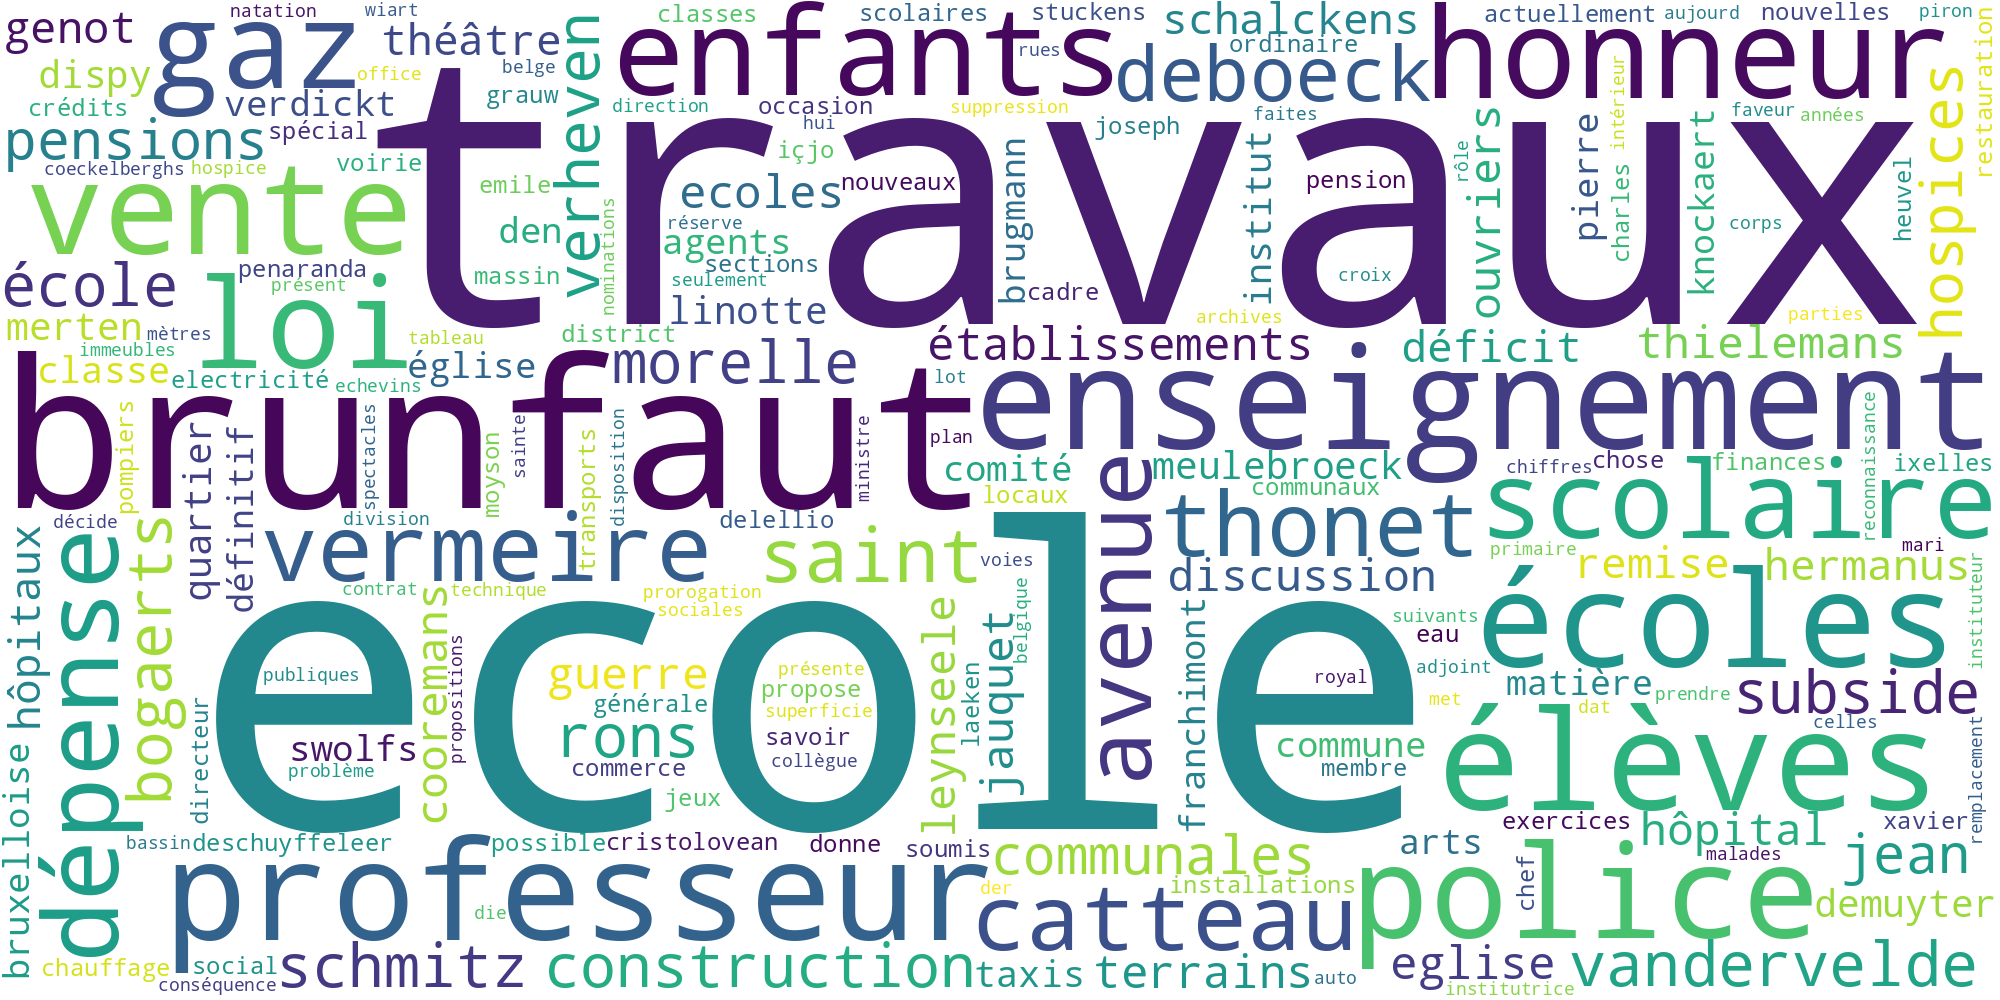

In [84]:
cloud = WordCloud(width=2000, height=1000, background_color='white').generate_from_frequencies(frequencies)
cloud.to_file(os.path.join(temp_path, f"{year}.png"))
Image(filename=os.path.join(temp_path, f"{year}.png"))